In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm

In [20]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 16 rows and 15 cols


In [5]:
inds_beam = set()
n = len(input_text[0])
n_splits = 0
for i_r, r in enumerate(input_text):
    for i_c, c in enumerate(r):
        if i_r == 0 and c == 'S':
            inds_beam.add(i_c)
            break 
        
        if c == '^' and i_c in inds_beam:
            n_splits += 1
            inds_beam.remove(i_c)
            if i_c > 0:
                inds_beam.add(i_c - 1)
            if i_c < n - 2:
                inds_beam.add(i_c + 1)

print(n_splits)

1698


## part 2

In [26]:
from collections import defaultdict

prev_beams = defaultdict(int)
for i_c, c in enumerate(input_text[0]):
    if c == 'S':
        prev_beams[i_c] = 1
        break 

mat_vis = np.zeros((15, 15))
for i_r, r in enumerate(input_text[1:]):
    new_beams = defaultdict(int)
    for i_c, c in enumerate(r):
        if i_c in prev_beams.keys():
            if c == '^':
                if i_c > 0:
                    new_beams[i_c - 1] +=  prev_beams[i_c]
                if i_c < n - 2:
                    new_beams[i_c + 1] += prev_beams[i_c]
            else:
                new_beams[i_c] = prev_beams[i_c]
    prev_beams = new_beams
    for k, v in prev_beams.items():
        mat_vis[i_r, k] = v
    print(i_r + 1, prev_beams)



1 defaultdict(<class 'int'>, {7: 1})
2 defaultdict(<class 'int'>, {6: 1, 8: 1})
3 defaultdict(<class 'int'>, {6: 1, 8: 1})
4 defaultdict(<class 'int'>, {5: 1, 7: 2, 9: 1})
5 defaultdict(<class 'int'>, {5: 1, 7: 2, 9: 1})
6 defaultdict(<class 'int'>, {4: 1, 6: 3, 8: 3, 10: 1})
7 defaultdict(<class 'int'>, {4: 1, 6: 3, 8: 3, 10: 1})
8 defaultdict(<class 'int'>, {3: 1, 5: 4, 7: 3, 8: 3, 9: 1, 11: 1})
9 defaultdict(<class 'int'>, {3: 1, 5: 4, 7: 3, 8: 3, 9: 1, 11: 1})
10 defaultdict(<class 'int'>, {2: 1, 4: 5, 6: 4, 7: 3, 8: 4, 10: 2, 12: 1})
11 defaultdict(<class 'int'>, {2: 1, 4: 5, 6: 4, 7: 3, 8: 4, 10: 2, 12: 1})
12 defaultdict(<class 'int'>, {1: 1, 3: 1, 4: 5, 5: 4, 7: 3, 8: 4, 10: 2, 11: 1, 13: 1})
13 defaultdict(<class 'int'>, {1: 1, 3: 1, 4: 5, 5: 4, 7: 3, 8: 4, 10: 2, 11: 1, 13: 1})
14 defaultdict(<class 'int'>, {0: 1, 2: 2, 4: 9, 6: 7, 8: 4, 10: 2, 11: 1, 12: 1, 14: 1})
15 defaultdict(<class 'int'>, {0: 1, 2: 2, 4: 9, 6: 7, 8: 4, 10: 2, 11: 1, 12: 1, 14: 1})


In [22]:
sum(new_beams.values())

28

<Axes: >

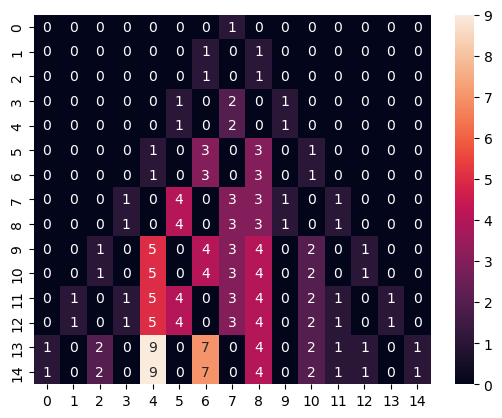

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
# plt.imshow(mat_vis)
sns.heatmap(mat_vis, annot=True, fmt='g')